# Cytometry Modeling and Analysis
August 10, 2021

Assignment I 

## 1. Describing Cell Surface Composition

In general there are two options for measuring cell status: 
- gene expression and 
- protein-based assays. 

Due to the scale of cell processes, the activity of one gene-coding region or expressed protein alone will not be informative of overall cell status. Instead, these techniques produce thousands of measurements that must usually be analyzed together. 

### 1.1 Introduction 

**Log-normal distributions**

A **normal** distribution results when a process results from the sum of many random variables (see *Central Limit Theeorem*, CLT). When it is instead the *product* of many non-negative variables, the process is log-normal and instead, its logarithm approaches a normal distribution. 

Many physically measurable quantities (such as mass, size, brightness) cannot be negative and are the products of different random factors. This is an extension of CLT and stated by called Gibrat's law: 

"The rate of growth is independent of its absolute size". 

In our case we might state that the rate of addition of receptor onto the cell surface is independent of the amount of receptor present. 

**Origins of surface receptor expression variability**

In cells corresponding to one genome, variability would result from random differences in: 
1. The number of mRNA transcribed
2. The copy number for each mRNA
3. The extent and efficiency of post-translation modifications
4. The efficiency of transport to the cell surface
5. Any other intervening factors that could prevent the protein from becoming expressed

A simple model could be the following. In order for receptor $X$ to be successfully expressed on the cell surface it is dependent on *N* variables, i.e. concentrations of other biomolecules, $M_i$, that are normally distributed. Protein synthesis and other biological pathways are often sequential or stepwise so let's say receptor x is a process that could be modeled with: 

\begin{align}
    [X] &= c_1[M_1]  \cdot c_1[M_2] \cdot \mathrm{...} \cdot c_N[M_N] \\
        &= \prod_{\mathrm{i = 1 to N}}{c_i[M_i]}
\end{align}

Compare this with the simple statement of concerted first order chemical kinetics: 

\begin{align} 
    M_1 + M_2 & -> X \\
    r_X &= k [M_1] \cdot [M_2]
\end{align}

As stated above, we expect dist([X]) to be log-normal, especially as N tends to be large. Let's take a look first at the distributions for 5 biomolecules in 10,000 cells. 

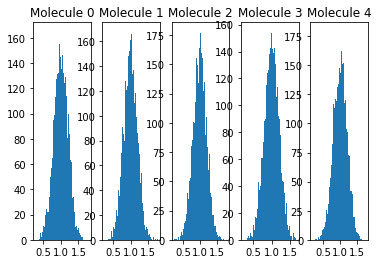

In [438]:
n_dots = 10000
n_marks = 5

# 500 measurements of 5 biomarkers
m = [np.random.normal(5, size=n_dots)/5 for i in range(0,n_marks)]

#make nonnegative
m = [[abs(m[i][j]) for j in range(0,n_dots)] for i in range(0,5)]

for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.hist(m[i],bins = 200)
    plt.title("Molecule " + str(i))


When these are multiplied together, a true log-normal distribution results. 

In biology-speak this signifies that although the cells all contain random concentrations of the reactant molecules, in the inevitable event that a cell has slightly elevated molecule concentrations overall, each will have an amplifying effect and lead to excessively high production of $X$.

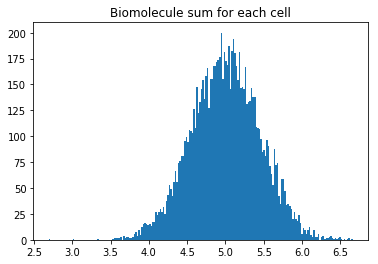

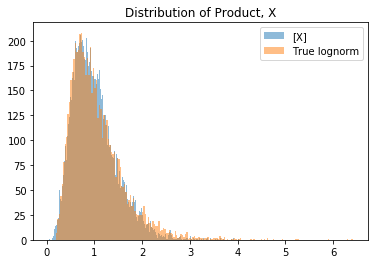

(1.3323102160718172, 4.006208104186658)

In [442]:
#calculate X
x = np.sum(m,axis=0)

sum_max = max(x)/np.mean(x)

# real lognormal
np.random.seed(100) #keep results the same
real = np.random.normal(1,0, size=6500)

plt.hist(x,bins=200,label='[X]')
#plt.hist(real,bins=200,alpha=0.5,label='True lognorm')
plt.title("Biomolecule sum for each cell")
plt.show()

# Multiplication

#calculate X
x = np.product(m,axis=0)

prod_max = max(x)/np.mean(x)

# real lognormal
np.random.seed(100) #keep results the same
real = np.random.lognormal(np.log10(0.85),0.5, size=6500)

plt.hist(x,bins=200,alpha=0.5,label='[X]')
plt.hist(real,bins=200,alpha=0.5,label='True lognorm')
plt.title("Distribution of Product, X")
plt.legend()
plt.show()
sum_max, prod_max

To describe this asymmetry we can see that the cell with the highest biomolecule sum lies just 1.3x higher than the mean sum, while the cell with the highest concentration of $X$ is 4x the mean of $X$.

### 1.2 First look with a cell generator

First sample 500 cells from a population and measure 10 features. Each feature for each event should be a random observation between the cytometry detection limits of [0,10000]. Print the first 5 events.

In [1]:
# ENTER CODE HERE

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 

n_features = 10
n_events = 500
names = ['Feature ' + str(i) for i in range(1,n_features+1)]
np.random.seed()

events = {x:np.random.uniform(0,10000,n_events).astype(int) for x in 
                                        names for 
                                        n in range(0,n_features)}
df = pd.DataFrame(events)
df[0:5]

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10
0,3547,9951,9440,7004,6858,8788,5213,9661,9355,6768
1,1039,9247,4475,2134,5150,3144,317,1220,9440,5957
2,2323,596,4562,6656,3333,8848,6953,8683,9968,7143
3,439,4152,6083,2275,6976,1590,4188,3535,5702,4071
4,2698,9884,5738,9080,9665,909,1322,2862,3922,6908


Now use a bivariate scatter plot to visualize the first two features (all events). Which scale (linear or logarithmic) better represents the data and why?

In [3]:
# ENTER CODE HERE

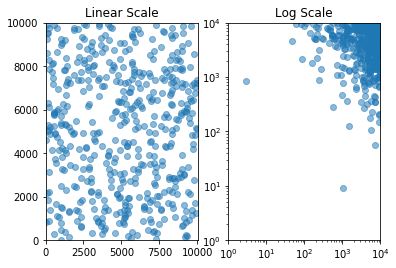

In [295]:
def plotter_1(x,y):

    plt.subplot(1,2,1)
    plt.scatter(x,y,alpha=0.5)

    plt.title('Linear Scale')
    plt.xlim(1,np.max(x+50)), plt.ylim(1,np.max(y+50))
    #plt.xscale('log'), plt.yscale('log')

    plt.subplot(1,2,2)
    plt.scatter(x,y,alpha=0.5)

    plt.title('Log Scale')
    plt.xlim(1,np.max(x+50)), plt.ylim(1,np.max(y+50))
    plt.xscale('log'), plt.yscale('log')
    plt.show()
    
plotter_1(events['Feature 1'],events['Feature 2'])

## 1.3 Representing a uniform cell sample

Now that we know how to expect to see cell surface receptors distributed among cells, we can generate a population of five hundred cells with 10 features. Log-normally distribute each cell around a population feature mean chosen from 10 to 1,000 with a uniform probability. Assume standard deviations are also randomly distributed between 2 and 10.

Print the first 5 events and generate the same bivariate plots. Which axis scale best represents the data, why? 

In [5]:
# ENTER CODE HERE

In [6]:
n_features = 10
n_events = 500
names = ['Feature ' + str(i) for i in range(0,n_features)]
np.random.seed()
means = np.random.uniform(100,8000,n_features)
sd = np.random.uniform(2,10,n_features)

cells = {x:np.random.lognormal(y,z,n_events) for x,y,z in 
                                        zip(names,
                                            np.log10(means),
                                            np.log10(sd)) for 
                                        n in range(0,n_features)}

df = pd.DataFrame(events)
df[0:5]

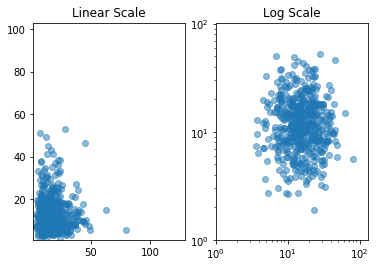

In [296]:
plotter_1(cells['Feature 1'],cells['Feature 2'])

## 1.4 Mixed cell samples

Generate *two* populations of five hundred cells, each with different 

Start with a bivariate plot of: 
- Feature 1 vs Feature 2 
- Feature 3 vs Feature 4

In [ ]:
# ENTER CODE HERE

In [152]:
n_features = 10
n_events = 500
names = ['Feature ' + str(i) for i in range(0,n_features)]
np.random.seed()
means = np.random.uniform(2,6,n_features)
sd = np.random.uniform(2,10,n_features)

cells = {x:np.random.lognormal(y,z,n_events) for x,y,z in 
                                        zip(names,
                                            means,
                                            np.log10(sd)) for 
                                        n in range(0,n_features)}

means = np.random.uniform(2,6,n_features)
sd = np.random.uniform(2,10,n_features)

cells2 = {x:np.random.lognormal(y,z,n_events) for x,y,z in 
                                        zip(names,
                                            means,
                                            np.log10(sd)) for 
                                        n in range(0,n_features)}


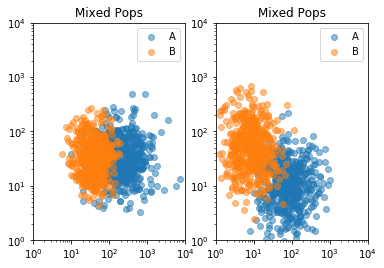

In [153]:
#c1, c2 feature names
def plotter_2(df1,df2,names):
    

    for i in (1,2):
        x = df1[names[i*2]]
        y = df1[names[i*2+1]]
        
        plt.subplot(1,2,i)
        plt.scatter(x,y,alpha=0.5,label='A')

        plt.title('Mixed Pops')
        plt.xlim(1,10000), plt.ylim(1,10000)
        plt.xscale('log'), plt.yscale('log')

        x = df2[names[i*2]]
        y = df2[names[i*2+1]]

        plt.scatter(x,y,alpha=0.5,label='B')

        plt.title('Mixed Pops')
        plt.xlim(1,10000), plt.ylim(1,10000)
        plt.xscale('log'), plt.yscale('log')
        plt.legend()
    
    
    plt.show()
    
plotter_2(cells,cells2,names)

We can also generate 3D plots of various feature combinations

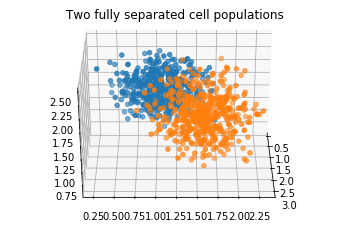

In [290]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for data in [df1,df]:
    ax.scatter(np.log10(data['Feature '+str(features[0])]),
               np.log10(data['Feature '+str(features[1])]),
               np.log10(data['Feature '+str(features[2])]))
ax.set_title("Two fully separated cell populations")

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 180, angle), interval=30)
ani.save('mixed-pops.gif', writer=animation.PillowWriter(fps=20))

## 2. Clustering 

### 2.1 Population clustering

### 2.2 Population subsetting (multi-gating)

In [277]:
n_features = int(10)
n_events = 500
names = ['Feature ' + str(i) for i in range(0,n_features)]
np.random.seed()
means = np.random.uniform(2,6,n_features)
sd = np.random.uniform(2,6,n_features)

cells = {x:np.random.lognormal(y,z,n_events) for x,y,z in 
                                        zip(names,
                                            means,
                                            np.log10(sd)) for 
                                        n in range(0,n_features)}

df1 = pd.DataFrame(cells)

means = np.random.uniform(2,6,n_features)
sd = np.random.uniform(2,6,n_features)

half_events = int(n_events/2)
cells2a = {x:np.random.lognormal(y,z,half_events) for x,y,z in 
                                        zip(names,
                                            means,
                                            np.log10(sd)) for 
                                        n in range(0,n_features)}

# choose a new mean for 
means[5:9] = np.random.uniform(2,6)

cells2b = {x:np.random.lognormal(y,z,half_events) for x,y,z in 
                                        zip(names,
                                            means,
                                            np.log10(sd)) for 
                                        n in range(0,n_features)}



dfA = pd.DataFrame(cells2a)
dfB = pd.DataFrame(cells2b)
df = pd.concat([dfA,dfB])
df[0:5]

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,13.017980,328.512329,46.488868,158.896661,14.484705,25.935011,80.515913,92.723060,380.545426,109.216350
1,4.344803,514.882670,35.032486,156.586685,17.868738,25.444994,18.580118,317.627697,352.424339,110.731066
2,8.852053,202.164336,23.724415,312.315872,17.103804,39.134222,43.457783,227.508540,322.548030,112.325530
3,9.490709,506.319218,70.271221,190.388326,22.316550,69.221691,11.044393,274.522443,293.604222,115.880604
4,9.949300,309.694271,22.065948,628.440999,17.401845,16.185826,20.445262,75.932709,227.762924,94.036810


Print the feature means and standard deviations for each cell population separately

In [ ]:
# ENTER CODE HERE

In [306]:
np.mean(df), np.std(df)

(Feature 0     13.042526
 Feature 1    377.323160
 Feature 2     44.451948
 Feature 3    307.109832
 Feature 4     23.060346
 Feature 5     26.368866
 Feature 6     26.194701
 Feature 7    101.676506
 Feature 8    169.011108
 Feature 9    106.893908
 dtype: float64, Feature 0      8.847878
 Feature 1    137.623681
 Feature 2     29.594625
 Feature 3    170.541994
 Feature 4     10.026466
 Feature 5     15.900889
 Feature 6     10.110445
 Feature 7    112.477824
 Feature 8    185.274389
 Feature 9     52.135673
 dtype: float64)

Plot the data in 3D. With real-world data we can only discriminate between sub-populations that are "spatially" separated in one or more of the features. 

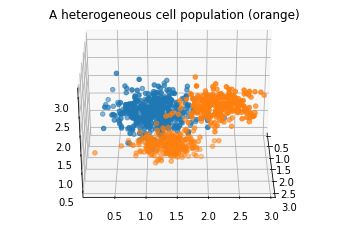

In [292]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

features = [1,7,8]

for data in [df1,df]:
    ax.scatter(np.log10(data['Feature '+str(features[0])]),
               np.log10(data['Feature '+str(features[1])]),
               np.log10(data['Feature '+str(features[2])]))

ax.set_title("A heterogeneous cell population (orange)")

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 180, angle), interval=30)
ani.save('hetero-pops.gif', writer=animation.PillowWriter(fps=20))

## 3. Statistics

Conventionally, once a cell population has been identified and isolated (i.e. **gated**), the population level characteristics are reported in units of geometric mean fluorescent intensity (MFI) relative to the reference MFI -- a suitably chosen control. 

This enables researchers to report FCM data in arbitrary units (MFI) and relative units (MFI/MFI) without needing to know exactly how many receptors one MFI unit would equal on the cell surface. Though there is a number which can be established using additional controls.

### 3.1 Measures of Central Tendency

### 3.2 Reporting subsets

In [ ]:
# PCA 